# Project 1
## Integration of Mergesort & Insertion Sort

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### a) Algorithm Implementation

### Insertion Sort

In [2]:
def insertionSort(arr):
   
    for i in range(1, len(arr)): # Traverse through array from index 1
 
        key = arr[i] # Pick up value at each index starting from index 1

        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right 
        arr[j + 1] = key 
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr

### Hybrid Sort

#### Merge Function

In [3]:
def merge(arr1, arr2): 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr


In [4]:
def hybridSort(arr,S):
    if len(arr)<=1:
        return arr
    
    if len(arr) > S:
        m = len(arr)//2 # Find midpoint m
 
        # Sort first and second halves
        arr[:m] = hybridSort(arr[:m],S)
        arr[m:] = hybridSort(arr[m:],S)
        arr = merge(arr[:m], arr[m:])
        
        return arr
    else:
        arr = insertionSort(arr)
        return arr

In [5]:
arr = [3,6,8,9,2,1,4,5,10,7,12,11,3,3,3]
hybridSort(arr,4)
print(arr)
type(arr)

[1, 2, 3, 4, 6, 8, 9, 3, 3, 3, 5, 7, 10, 11, 12]


list

## b) Generate input data (data array sizes)

In [6]:
arrSizes = []
for i in range(10):
    arrSizes.append(1000*(i+1))
for i in range(10):
    arrSizes.append(10000*(i+1))
for i in range(10):
    arrSizes.append(100000*(i+1))
for i in range(10):
    arrSizes.append(1000000*(i+1))

In [7]:
arrSizes

[1000,
 2000,
 3000,
 4000,
 5000,
 6000,
 7000,
 8000,
 9000,
 10000,
 10000,
 20000,
 30000,
 40000,
 50000,
 60000,
 70000,
 80000,
 90000,
 100000,
 100000,
 200000,
 300000,
 400000,
 500000,
 600000,
 700000,
 800000,
 900000,
 1000000,
 1000000,
 2000000,
 3000000,
 4000000,
 5000000,
 6000000,
 7000000,
 8000000,
 9000000,
 10000000]

## c) Analyze time complexity

### Count key comparisons

In [8]:
def insertionSort2(arr):
    comparisons = 0
    for i in range(1, len(arr)): # Traverse through array from index 1
        key = arr[i] # Pick up value at each index starting from index 1
        j = i-1 # j is to present the indexes before the key index
        while j >= 0 and key < arr[j] :
            comparisons += 1
            arr[j + 1] = arr[j]
            j -= 1
            # While the elements before the key are greater than the key
            # Move elements one to the right 
        if j > 0 :
            comparisons += 1
        arr[j + 1] = key 
        # Once the element is smaller than the key
        # Insert the key to the right of that element
    return arr, comparisons

def merge2(arr1, arr2): 
    comparisons = 0 
    i = j = 0 
    sorted_arr = [] 
    while (i != len(arr1) and j != len(arr2)): 
        if arr1[i] < arr2[j]: 
            sorted_arr.append(arr1[i]) 
            i += 1 
        elif arr1[i] > arr2[j]: 
            sorted_arr.append(arr2[j]) 
            j += 1 
        else: 
            sorted_arr.append(arr1[i]) 
            sorted_arr.append(arr2[j]) 
            i += 1 
            j += 1 
        comparisons += 1 
    while i != len(arr1): 
        sorted_arr.append(arr1[i]) 
        i += 1 
    while j != len(arr2): 
        sorted_arr.append(arr2[j]) 
        j += 1 
    return sorted_arr, comparisons

def hybridSort2(arr,S):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    
    if len(arr) > S:
        m = len(arr)//2 
        arr[:m], first_half_comparisons = hybridSort2(arr[:m],S)
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = hybridSort2(arr[m:],S)
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        return arr, comparisons
    else:
        arr, comparisons = insertionSort2(arr)
        return arr, comparisons
    

In [9]:
arr = [3,6,8,9,2,1,4,5,10,7,12,11,3,3,3]
hybridSort2(arr,4)

([1, 2, 3, 3, 3, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], 36)

#### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n. Compare your empirical results with your theoretical analysis of the time complexity.

In [10]:
from random import seed
from random import randint

np.random.seed(22)
arrSize = []

for i in range(1000):
    arrSize.append(i)
s = 10
if __name__ == '__main__':
    sizeComparisons = []
    for siz in arrSize:
        arr = np.random.randint(10000, size=siz)
        arr, comparisons = hybridSort2(arr,s)
        sizeComparisons.append(comparisons)

Text(0.5, 1.0, 'Key Comparisons against Array Size')

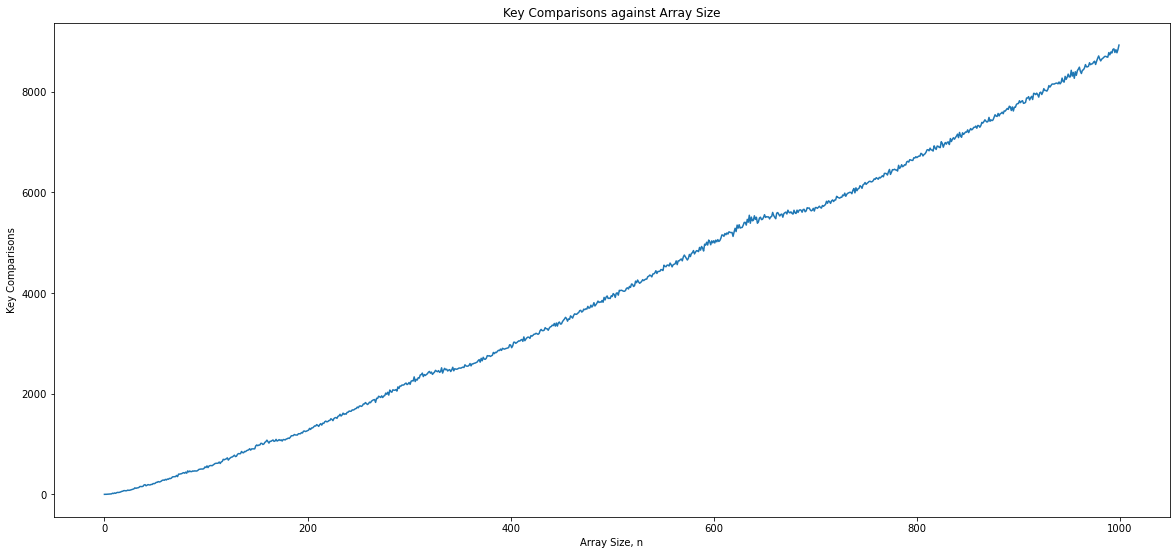

In [11]:
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arrSize, sizeComparisons)
ax.set_xlabel("Array Size, n")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size")

#### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

Text(0.5, 1.0, 'Key Comparisons against Threshold Values, S')

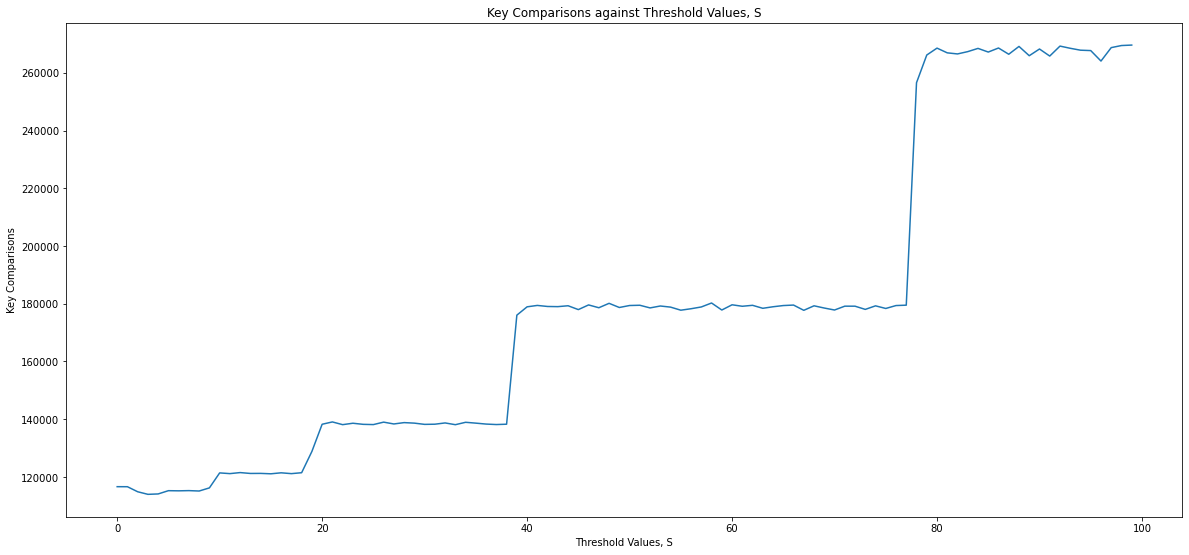

In [12]:
np.random.seed(22)
if __name__ == '__main__':
 sValues = range(0,100)
 arraySize = 10000 # Set array size to 10000
 sComparisons = []
 for s in sValues:
    arr = np.random.randint(10000,size = arraySize)
    arr, comparisons = hybridSort2(arr,s)
    sComparisons.append(comparisons)
    
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(sValues,sComparisons) 
ax.set_xlabel("Threshold Values, S")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Threshold Values, S")


### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

In [13]:
def mergeSort(arr):
    comparisons = 0
    if len(arr)<=1:
        return arr, comparisons
    else:
        m = len(arr)//2 
        arr[:m], first_half_comparisons = mergeSort(arr[:m])
        comparisons += first_half_comparisons
        arr[m:], second_half_comparisons = mergeSort(arr[m:])
        comparisons += second_half_comparisons
        arr, merge_comparisons = merge2(arr[:m], arr[m:]) 
        comparisons += merge_comparisons
        
        return arr, comparisons
    

Optimal S is: 9


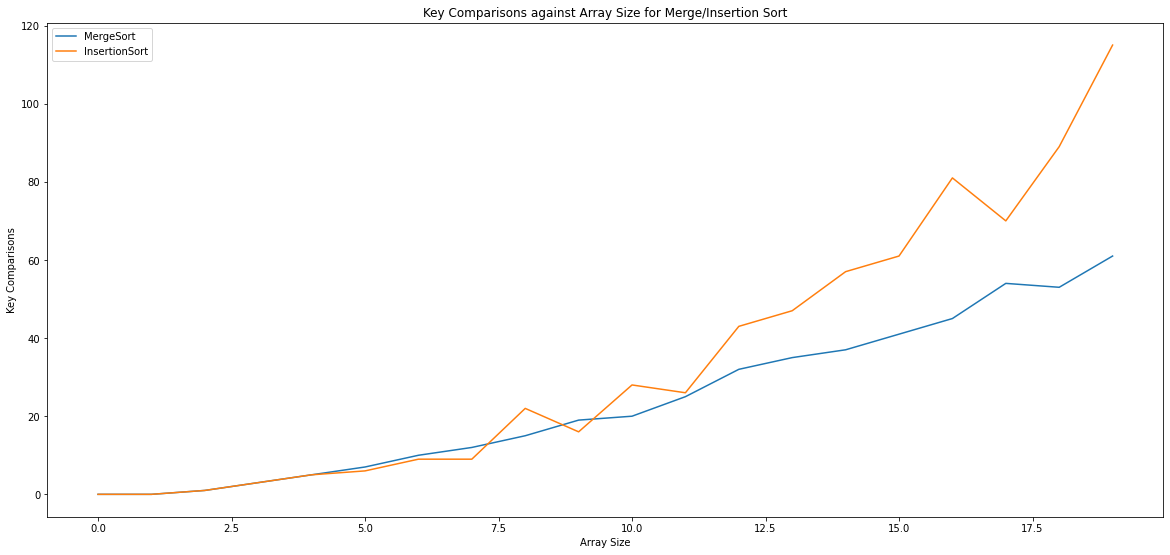

In [14]:
np.random.seed(22)
if __name__ == '__main__':
 optimalS = 0
 arraySize = range(0,20)
 mergeComparisons = []
 insertionComparisons = []
 mergeComparison = 0
 for s in arraySize:
    arr = np.random.randint(10000,size = s)
    arr2 = arr.copy()
    arr,mergeComparison = mergeSort(arr)
    arr2, insertionComparison = insertionSort2(arr2)
    if insertionComparison < mergeComparison:
        optimalS = s
    mergeComparisons.append(mergeComparison)
    insertionComparisons.append(insertionComparison)
    
f = plt.figure(figsize=(20,20))
ax = f.add_subplot(211)
ax.plot(arraySize,mergeComparisons, label="MergeSort") 
ax.plot(arraySize, insertionComparisons, label = "InsertionSort")
ax.set_xlabel("Array Size")
ax.set_ylabel("Key Comparisons")
ax.set_title("Key Comparisons against Array Size for Merge/Insertion Sort")
ax.legend()

print('Optimal S is:', optimalS)

### (d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [15]:
np.random.seed(22)
if __name__ == '__main__':
        arr10mil = []
        arr10mil = np.random.randint(10000000,size =10000000)
        arr10mil_2 = arr10mil.copy()

        start_time1 = time.time()
        arr10mil, hybridComparisons = hybridSort2(arr10mil, 9)
        end_time1 = (time.time() - start_time1)

        start_time2 = time.time()
        arr10mil_2, mergeComparisons = mergeSort(arr10mil_2)
        end_time2 = (time.time() - start_time2)

print("CPU Time for Hybrid Sort is:", end_time1)
print("CPU Time for Merge Sort is:", end_time2)  
print("Key Comparisons for Hybrid Sort is:", hybridComparisons)  
print("Key Comparisons for Merge Sort is:", mergeComparisons)  

CPU Time for Hybrid Sort is: 119.16601204872131
CPU Time for Merge Sort is: 139.95233511924744
Key Comparisons for Hybrid Sort is: 217041833
Key Comparisons for Merge Sort is: 216324238
